# CS5920J Assignment 1
1. Implemented the K Nearest Neighbours algorithm for $K = 1$ and $K = 3$ on iris dataset
2. Implemented the K Nearest Neighbours algorithm for $K = 1$ and $K = 3$ on ionosphere dataset
3. Extra marks - implemented the K Nearest Neighbours algorithm for a general K

In [58]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

### 1. Iris Dataset
#### 1-1. K Nearest Neighbours algorithm ($K = 1$)

Load iris dataset and split it into the training and test sets. Use a birthday as random_state

In [103]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=924)

In [60]:
def euclidean_dist(train, test):
    """Create (test,training) pair so that calculate Euclidean distances between each test sample and all training samples"""
    """(X_test: 38) * (X_train: 112) = 4256 pairs """
    eucl_dist_list = []
    dist = [[testval, trainval] for testval in test for trainval in train]
    for n in range(len(dist)):
        euclidean_dist = sum((dist[n][0]-dist[n][1])**2)
        eucl_dist_list.append(euclidean_dist)
    return eucl_dist_list

In [61]:
print("#_distance_pair", len(euclidean_dist(X_train, X_test)))

#_distance_pair 4256


In [62]:
def find_nearest(distances):
    """Find the nearest distance,i.e.nearest neighbour, per every test sample and return their index"""
    loc = []
    test_size = len(X_train)
    for n in range(0, int(len(distances)/test_size)):
        dist_per_test = distances[test_size*n:test_size*n+test_size]
        nearest = min(distances[test_size*n:test_size*n+test_size])
        its_loc = dist_per_test.index(nearest)
        loc.append(its_loc)
    return loc

In [63]:
def predict_labels(nearest_loc_list):
    """Predict labels on the test samples"""
    pred_labels = []
    for nearest_loc in nearest_loc_list:
        y_predict = y_train[nearest_loc]
        pred_labels.append(y_predict)
    return pred_labels

In [64]:
def compute_error_rate(pred_labels, true_labels):
    """Compute the number of errors and test error rate"""
    num_of_errors = np.sum(pred_labels != true_labels)
    print("number_of_errors", num_of_errors)
    error_rate = (num_of_errors / len(X_test))
    print("test_error_rate:", error_rate)
    print("test_error_rate(%):", error_rate*100)
    return error_rate

In [65]:
euc_dist = euclidean_dist(X_train, X_test)
nearest = find_nearest(euc_dist)
predict = predict_labels(nearest)
err_rate = compute_error_rate(predict, y_test)

number_of_errors 2
test_error_rate: 0.05263157894736842
test_error_rate(%): 5.263157894736842


The test error rate of K Neighbours algorithm ($K = 1$) applied to iris.txt: 0.05263157894736842

#### 1-2. K Nearest Neighbours algorithm ($K = 3$)
Use the same functions, which are calculating Euclidean distance and computing the error rate, that is used in $K = 1$ algorithm

In [66]:
def find_three_nearest(distances):
    """Find the three nearest neighbours and their indexes"""
    nn_indexes = []
    test_size = len(X_train)
    for n in range(0, int(len(distances)/test_size)):
        dist_per_test = distances[test_size*n:test_size*n+test_size]
        nearest = min(dist_per_test)
        nearest_loc = dist_per_test.index(nearest)
        nn_indexes.append(nearest_loc)
        second = dist_per_test.copy()
        second.remove(nearest)
        second_nn = min(second)
        second_nn_loc = dist_per_test.index(second_nn)
        nn_indexes.append(second_nn_loc)
        third = second.copy()
        third.remove(second_nn)
        third_nn = min(third)
        third_nn_loc = dist_per_test.index(third_nn)
        nn_indexes.append(third_nn_loc)
    return nn_indexes

In [67]:
def threenn_predict(nn_indexes):
    """Following the Majority voting rule, predict the labels on test samples"""
    three_nn_labels = []
    y_predicts = []
    for nn_index in nn_indexes:
        label_match = y_train[nn_index]
        three_nn_labels.append(label_match)

    for n in range(0, int(len(three_nn_labels)/3)):
        labels_per_test = three_nn_labels[3*n:3*n+3]
        count_zero = labels_per_test.count(0)
        count_one = labels_per_test.count(1)
        count_two = labels_per_test.count(2)
        if (count_zero > count_one) and (count_zero > count_two):
            y_predicts.append(0)
        elif (count_one > count_zero) and (count_one > count_two):
            y_predicts.append(1)
        else:
            y_predicts.append(2)

    return y_predicts

In [68]:
three_nn_euc_dist = euclidean_dist(X_train, X_test)
three_nearest = find_three_nearest(three_nn_euc_dist)
three_nearest_predict = threenn_predict(three_nearest)
three_nn_err_rate = compute_error_rate(three_nearest_predict, y_test)

number_of_errors 2
test_error_rate: 0.05263157894736842
test_error_rate(%): 5.263157894736842


The test error rate of K Neighbours algorithm ($K = 3$) applied to iris.txt: 0.05263157894736842

### 2. Ionosphere Dataset
#### 2-1. K Nearest Neighbours algorithm ($K = 1$)

Load ionosphere dataset and split it into data and labels

In [80]:
ionosphere_data = np.genfromtxt("ionosphere.txt", delimiter=",", usecols=np.arange(34))
ionosphere_label = np.genfromtxt("ionosphere.txt", delimiter=",", usecols=34, dtype="int")

Split it into the training and test sets. Use a birthday as random_state

In [94]:
X_train, X_test, y_train, y_test = train_test_split(ionosphere_data, ionosphere_label, random_state=924)

Use the same functions with iris dataset in implementing the Nearest Neighbour algorithm

In [71]:
iono_euc_dist = euclidean_dist(X_train, X_test)
iono_nearest = find_nearest(iono_euc_dist)
iono_predict = predict_labels(iono_nearest)
iono_err_rate = compute_error_rate(iono_predict, y_test)

number_of_errors 20
test_error_rate: 0.22727272727272727
test_error_rate(%): 22.727272727272727


The test error rate of K Neighbours algorithm ($K = 1$) applied to ionosphere.txt: 0.22727272727272727

#### 2-2. K Nearest Neighbours algorithm ($K = 3$)

In [82]:
def ion_three_nn_predict(nn_indexes):
    """Following the Majority voting rule, predict the labels on test samples"""
    three_nn_labels = []
    y_predicts = []
    for nn_index in nn_indexes:
        label_match = y_train[nn_index]
        three_nn_labels.append(label_match)

    for n in range(0, int(len(three_nn_labels)/3)):
        labels_per_test = three_nn_labels[3*n:3*n+3]
        count_negative = labels_per_test.count(-1)
        count_positive = labels_per_test.count(1)
        if count_negative > count_positive:
            y_predicts.append(-1)
        else:
            y_predicts.append(1)

    return y_predicts

In [86]:
i_three_nn_euc_dist = euclidean_dist(X_train, X_test)
i_three_nearest = find_three_nearest(i_three_nn_euc_dist)
i_three_nearest_predict = ion_three_nn_predict(i_three_nearest)
i_three_nn_err_rate = compute_error_rate(i_three_nearest_predict, y_test)

number_of_errors 21
test_error_rate: 0.23863636363636365
test_error_rate(%): 23.863636363636363


The test error rate of K Neighbours algorithm ($K = 3$) applied to ionosphere.txt: 0.23863636363636365

### 3. Extra marks
Implementing the K Nearest Neighbours algorithm for a general K with iris and ionosphere datasets

In [90]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

Text(0, 0.5, 'Accuracy')

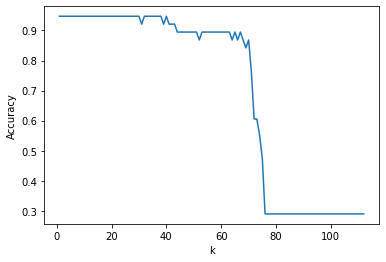

In [93]:
"""iterate k in range(1,113) because the training set has 112 samples"""
k_range = range(1,113)
accuracies = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train,y_train)
    accuracy = classifier.score(X_test,y_test)
    accuracies.append(accuracy)

plt.plot(k_range, accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

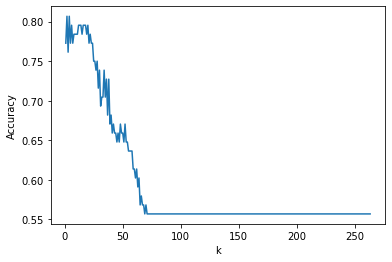

In [95]:
"""In case of ionosphere dataset, iterate k in range(1,264) because the training set has 263 samples"""
i_k_range = range(1,264)
i_accuracies = []

for k in i_k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    i_accuracy = classifier.score(X_test, y_test)
    i_accuracies.append(i_accuracy)

plt.plot(i_k_range, i_accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")

As we all know, both graphs showing that the accuracy of K Nearest Neighbours algorithm is significantly decreasing as K increases